<a href="https://colab.research.google.com/github/arturcgs/BootcampDataScienceAplicada3/blob/main/M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#importando produção hospitalar qndo foi processada
dados = pd.read_csv("/content/drive/MyDrive/BootCamp Data Science 3/Prod_Hosp_SUS.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=11, 
                    thousands=".", decimal=",")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [ ]:
#arrumando o display de floats
pd.options.display.float_format = "{:.2f}".format

import numpy as np

#Ajustando a valor inexistente de 2021/Ago
dados["2021/Ago"] = pd.to_numeric(dados["2021/Ago"], errors="coerce")
dados["2021/Ago"].dropna(inplace=True)

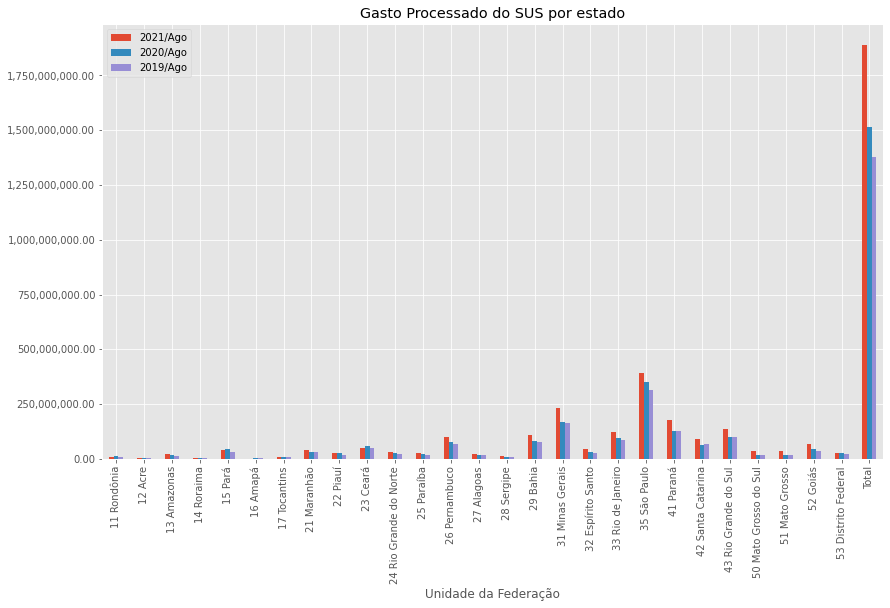

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plotando o gráfico de gasto por estado 
ax = dados.plot(x="Unidade da Federação", y=["2021/Ago", "2020/Ago", "2019/Ago"], kind="bar", figsize=(14,8))
plt.title("Gasto Processado do SUS por estado")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.show()
plt.style.use('ggplot')

In [ ]:
 #importando o banco de dados de qndo foi feito o procedimento
dados2 = pd.read_csv("/content/drive/MyDrive/BootCamp Data Science 3/Procedimentos Hosp SUS.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=11, 
                    thousands=".", decimal=",")
dados2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9838,9506,8710,7159,7443,7797,8560,9073,8596,9004,9139,8801,8932,8676,10153,10051,10243,9220,8130,6192,1826,1448181
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3980,4066,3793,3961,3120,3024,3511,3162,3259,3589,4065,3987,4032,3872,3989,4114,3654,3622,3861,3799,3668,2840,2818,3073,3571,3574,3726,3985,3859,3901,4061,3846,4030,3930,4161,3853,3391,2097,-,659770
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15347,12297,13284,13955,15422,15734,15750,15819,15499,16391,17966,15758,17649,16847,17922,17552,17543,14105,7167,2361068
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3250,3371,3541,3415,3612,3407,3616,3576,3580,3239,2072,487698
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31530,32415,36057,37171,36745,38545,37309,36327,37233,35158,41779,38160,39967,38167,33257,23036,5782,6703021


In [ ]:
# pegando somente as colunas que tem tds os campos preenchidos
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")

dados2_corrigido = dados2[colunas_usaveis]
dados2_corrigido = dados2_corrigido.set_index("Unidade da Federação") #adicionando o índice
dados2_corrigido.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,5242,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,5864,7062,6923,9130,8415,8403,7383,7884,8161,8521,8352,8359,8670,7945,9036,8551,8622,7861,8332,8618,8403,8182,8293,7930,7821,7785,8691,8836,8274,...,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9838,9506,8710,7159,7443,7797,8560,9073,8596,9004,9139,8801,8932,8676,10153,10051,10243,9220,8130,6192,1448181
12 Acre,3735,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4056,3782,4519,4274,4597,3933,3787,3027,4232,4158,4026,4034,3624,4556,4508,4293,3963,3958,4102,4156,4406,4124,4054,4621,4129,4573,4351,4863,...,3854,3980,4066,3793,3961,3120,3024,3511,3162,3259,3589,4065,3987,4032,3872,3989,4114,3654,3622,3861,3799,3668,2840,2818,3073,3571,3574,3726,3985,3859,3901,4061,3846,4030,3930,4161,3853,3391,2097,659770
13 Amazonas,16105,13830,14870,14323,14914,14578,14938,14419,13349,12607,12137,12054,12594,12171,13892,12228,12530,13410,13493,13746,12616,12711,12554,13547,12403,14619,13676,13545,13197,13188,13595,13492,14069,13214,13308,13981,13492,15193,14388,13666,...,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15347,12297,13284,13955,15422,15734,15750,15819,15499,16391,17966,15758,17649,16847,17922,17552,17543,14105,2361068
14 Roraima,1898,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,1986,2224,2142,2525,2256,2372,2371,2646,2610,2473,2447,2236,2568,2277,2828,2590,2984,3028,3085,3099,2800,2658,2528,2382,2541,1984,2077,2185,2620,...,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3250,3371,3541,3415,3612,3407,3616,3576,3580,3239,487698
15 Pará,43852,40231,43323,44804,44901,43422,42168,42630,43168,41580,39506,38092,42672,39248,46803,45701,44886,43625,44195,46068,44502,44227,41354,43788,42352,48042,44279,46368,43794,41939,45707,44420,42919,43122,42314,44277,42080,46632,42499,43524,...,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31530,32415,36057,37171,36745,38545,37309,36327,37233,35158,41779,38160,39967,38167,33257,23036,6703021


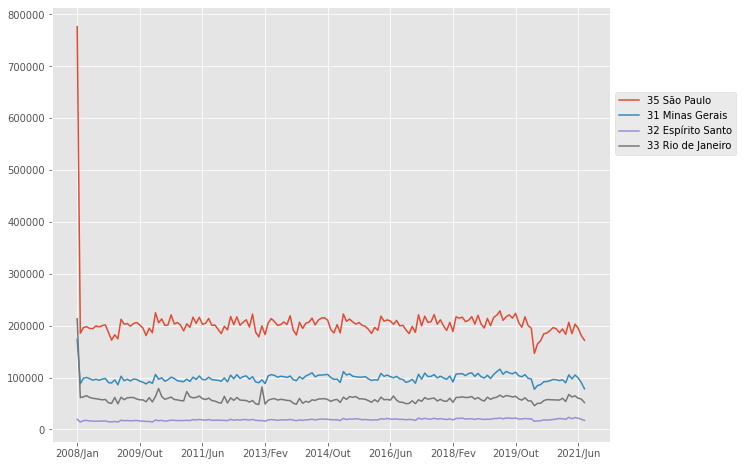

In [ ]:
#tirando a coluna e linha total
dados2_plot = dados2_corrigido.drop("Total", axis=1)
dados2_plot = dados2_plot.drop("Total", axis=0)

#selecionando estados desejados
estados_desejados = ["35 São Paulo", "31 Minas Gerais", "32 Espírito Santo", "33 Rio de Janeiro"]

#plotando o gráfico
dados2_plot.loc[estados_desejados].T.plot(figsize=(10,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.732))


In [ ]:
#Adicionando uma coluna com a região de cada estado

regioes = ["Norte", "Norte", "Norte", "Norte", "Norte", "Norte", "Norte", "Nordeste", "Nordeste", 
           "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Sudeste", "Sudeste", 
           "Sudeste", "Sudeste", "Sul", "Sul", "Sul", "Centro-Oeste", "Centro-Oeste", "Centro-Oeste", "Centro-Oeste"]

dados2_plot["Região"] = regioes

In [ ]:
#ordenando pelo total
dados2_ordenado_por_total = dados2_corrigido.sort_values("Total", ascending=False)

#tirando a linha e coluna total
dados2_ordenado_por_total = dados2_ordenado_por_total.drop("Total", axis=1)
dados2_ordenado_por_total = dados2_ordenado_por_total.drop("Total", axis=0)

#tirando 2008/Jan pq o dado ta estranho
dados2_ordenado_por_total = dados2_ordenado_por_total.drop("2008/Jan", axis=1)

dados2_ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,185424,196292,197998,194572,194274,199476,197696,200207,201527,186728,172055,182396,174641,212291,202948,204082,198990,204255,206033,201291,195321,180902,195241,186313,225150,205586,213090,200474,201506,220904,203220,206015,201149,189971,203610,196758,216346,204467,216153,202668,...,216358,207759,210411,217371,203309,219959,203096,195481,214024,200078,215743,220231,228400,210317,217353,220742,214419,223763,205978,196946,217091,200082,195266,146523,164615,171032,184096,185925,190535,196360,193982,186506,193733,183358,206522,184645,203011,194824,180948,171739
31 Minas Gerais,87923,98695,100205,97799,94915,96763,94759,96915,98250,90231,89594,95594,86029,102545,93834,96798,93338,97197,96338,92828,90975,87738,91998,88850,105939,96786,99391,92855,95841,100743,98170,93831,92741,92018,96859,92380,100749,96376,103022,96284,...,107467,103629,107773,109056,102226,108087,101595,99063,104374,98222,105854,111283,116131,106341,111848,108878,107201,110318,103499,101561,105666,98555,97102,77315,84585,86325,91884,92286,93865,96340,95670,94152,95672,89876,105316,97491,104932,99250,90283,78257
29 Bahia,60993,75006,80573,75881,69198,91182,75848,75074,71669,64643,61896,67990,64126,81365,76295,76771,71157,75225,76577,74433,74011,69139,71937,67226,82803,77954,82216,69310,73221,78157,74639,74344,73436,69611,75173,70505,78737,75869,77325,71443,...,73330,67352,72229,72712,69424,72600,67485,65372,68290,65385,69435,73113,78370,69170,75377,73568,71377,74515,68337,63430,67886,64783,63984,48184,49724,51266,55718,57083,59909,64245,61063,57027,58032,56828,63277,62127,68430,62228,57968,47609
41 Paraná,57836,64918,65000,65191,64095,67194,62628,64621,65187,59416,57034,59901,58283,70984,64644,67658,65752,69770,68570,66679,65124,61475,63445,62182,75306,67295,69203,66806,68118,69884,68508,66338,66841,63485,65811,63008,68519,63424,68299,62638,...,76675,74811,77485,77894,72632,77616,73922,67978,73970,71266,75898,78323,81018,74036,79212,75807,74963,77495,72990,68866,73521,71567,68657,54030,56963,56607,57605,58197,61779,65615,65777,59700,62234,62025,64971,63520,68096,58837,52557,44508
43 Rio Grande do Sul,55069,61981,60256,59481,61247,64957,61716,62381,62771,58966,55916,59546,52516,63938,59968,62237,61688,67181,62868,63420,61235,58719,60162,54508,65389,60789,62943,61134,63502,64580,60160,60655,58433,55424,59924,54461,61917,58548,62816,61581,...,63871,63258,67440,66977,60077,65406,60409,56459,62841,56740,62051,64800,68693,66257,69638,68249,64638,66959,62077,59879,65292,58402,57158,44976,50748,52744,53325,53980,55703,59065,59520,56505,58901,55060,60256,56110,61486,59053,55995,47560


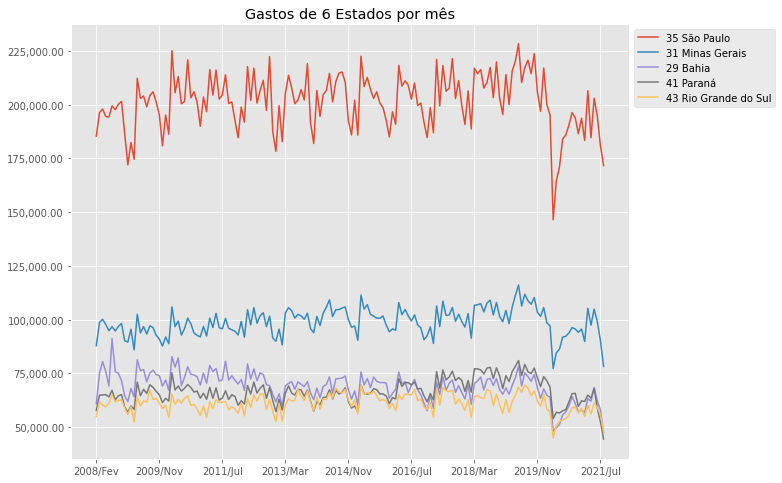

In [ ]:
#plotando o gráfico de linha pros 5 estados com maior gasto

ax = dados2_ordenado_por_total.head().T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Gastos de 6 Estados por mês")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.show()

In [ ]:
#separar o 5 estados com maior gasto e o Acre
cinco_maior_Ac = dados2_ordenado_por_total.head()
cinco_maior_Ac = cinco_maior_Ac.append(dados2_ordenado_por_total.loc["12 Acre"])
cinco_maior_Ac

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,185424,196292,197998,194572,194274,199476,197696,200207,201527,186728,172055,182396,174641,212291,202948,204082,198990,204255,206033,201291,195321,180902,195241,186313,225150,205586,213090,200474,201506,220904,203220,206015,201149,189971,203610,196758,216346,204467,216153,202668,...,216358,207759,210411,217371,203309,219959,203096,195481,214024,200078,215743,220231,228400,210317,217353,220742,214419,223763,205978,196946,217091,200082,195266,146523,164615,171032,184096,185925,190535,196360,193982,186506,193733,183358,206522,184645,203011,194824,180948,171739
31 Minas Gerais,87923,98695,100205,97799,94915,96763,94759,96915,98250,90231,89594,95594,86029,102545,93834,96798,93338,97197,96338,92828,90975,87738,91998,88850,105939,96786,99391,92855,95841,100743,98170,93831,92741,92018,96859,92380,100749,96376,103022,96284,...,107467,103629,107773,109056,102226,108087,101595,99063,104374,98222,105854,111283,116131,106341,111848,108878,107201,110318,103499,101561,105666,98555,97102,77315,84585,86325,91884,92286,93865,96340,95670,94152,95672,89876,105316,97491,104932,99250,90283,78257
29 Bahia,60993,75006,80573,75881,69198,91182,75848,75074,71669,64643,61896,67990,64126,81365,76295,76771,71157,75225,76577,74433,74011,69139,71937,67226,82803,77954,82216,69310,73221,78157,74639,74344,73436,69611,75173,70505,78737,75869,77325,71443,...,73330,67352,72229,72712,69424,72600,67485,65372,68290,65385,69435,73113,78370,69170,75377,73568,71377,74515,68337,63430,67886,64783,63984,48184,49724,51266,55718,57083,59909,64245,61063,57027,58032,56828,63277,62127,68430,62228,57968,47609
41 Paraná,57836,64918,65000,65191,64095,67194,62628,64621,65187,59416,57034,59901,58283,70984,64644,67658,65752,69770,68570,66679,65124,61475,63445,62182,75306,67295,69203,66806,68118,69884,68508,66338,66841,63485,65811,63008,68519,63424,68299,62638,...,76675,74811,77485,77894,72632,77616,73922,67978,73970,71266,75898,78323,81018,74036,79212,75807,74963,77495,72990,68866,73521,71567,68657,54030,56963,56607,57605,58197,61779,65615,65777,59700,62234,62025,64971,63520,68096,58837,52557,44508
43 Rio Grande do Sul,55069,61981,60256,59481,61247,64957,61716,62381,62771,58966,55916,59546,52516,63938,59968,62237,61688,67181,62868,63420,61235,58719,60162,54508,65389,60789,62943,61134,63502,64580,60160,60655,58433,55424,59924,54461,61917,58548,62816,61581,...,63871,63258,67440,66977,60077,65406,60409,56459,62841,56740,62051,64800,68693,66257,69638,68249,64638,66959,62077,59879,65292,58402,57158,44976,50748,52744,53325,53980,55703,59065,59520,56505,58901,55060,60256,56110,61486,59053,55995,47560
12 Acre,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4056,3782,4519,4274,4597,3933,3787,3027,4232,4158,4026,4034,3624,4556,4508,4293,3963,3958,4102,4156,4406,4124,4054,4621,4129,4573,4351,4863,4364,...,3970,3854,3980,4066,3793,3961,3120,3024,3511,3162,3259,3589,4065,3987,4032,3872,3989,4114,3654,3622,3861,3799,3668,2840,2818,3073,3571,3574,3726,3985,3859,3901,4061,3846,4030,3930,4161,3853,3391,2097


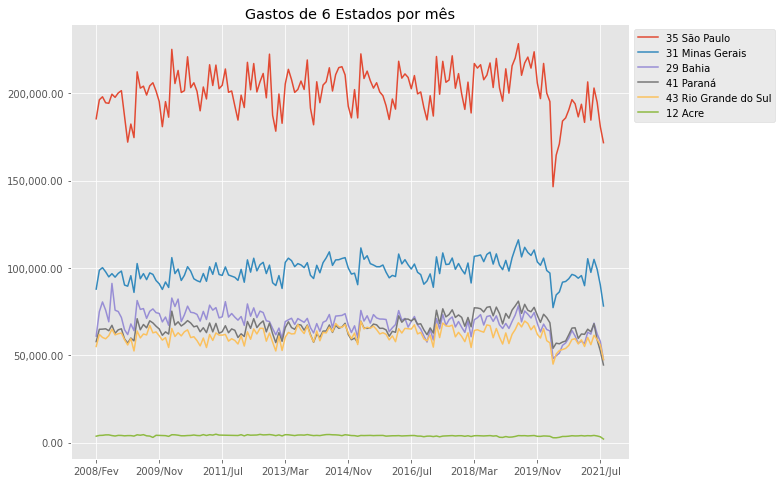

In [ ]:
#plotando o gráfico de linha pros 5 estados com maior gasto mais o Acre

ax = cinco_maior_Ac.T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Gastos de 6 Estados por mês")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.show()